### Time Series
A time series is an ordered sequence of values of a variable at equally spaced time intervals. The usage of time series models is twofold:
·        Obtain an understanding of the underlying forces and structure that produced the observed data
·        Fit a model and proceed to forecasting, monitoring or even feedback and feedforward control.
 
Time Series Analysis is used for many applications such as Sales Forecasting, Stock Market Analysis, Process and Quality Control, Census Analysis, etc. 


**Stationarity:** A common assumption in many time series techniques is that the data are stationary. A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality). For practical purposes, stationarity can usually be determined from a run sequence plot. AR models and MA models assume that the data is stationary.

**Trend:** The overall long-term direction of the series. Sometimes, no trend can be identified. Trends may be rising, falling, and sometimes there are no trends discernible. 

**Seasonality:** Refers to repeated behaviour in the time series that occurs after certain time intervals. Seasonality can sometimes be traced back to external influences.

**Cycles:** Time series that follow recurring up- and down trends that don’t exhibit seasonal characteristics, these patterns can be called cycles. 
Variation: All Data contains variation to a certain extent, some more than others. 

**Irregularities:** Unexplainable jumps or dips in the data can be traced back to exceptional happenings in the real world (accidents, scandals, natural catastrophes) 




##Data Analysis


In [ ]:
## Initialize libraries and path variables
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import Lasso
import datetime as dt 

import torch.nn as nn
import torch
import math
import torch.autograd as autograd
from torch.autograd import Variable


%matplotlib inline

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving avocado.csv to avocado (2).csv


In [ ]:
avocadoDat_unproc = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))
print(avocadoDat_unproc.head())
print()
print(avocadoDat_unproc.info())

   Unnamed: 0        Date  AveragePrice  ...          type  year  region
0           0  2015-12-27          1.33  ...  conventional  2015  Albany
1           1  2015-12-20          1.35  ...  conventional  2015  Albany
2           2  2015-12-13          0.93  ...  conventional  2015  Albany
3           3  2015-12-06          1.08  ...  conventional  2015  Albany
4           4  2015-11-29          1.28  ...  conventional  2015  Albany

[5 rows x 14 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64

##Features

**Date** - The date of the observation

**AveragePrice** - the average price of a single avocado

**type** - conventional or organic

**year** - the year

**Region** - the city or region of the observation

**Total Volume** - Total number of avocados sold

**4046** - Total number of avocados with PLU 4046 sold

**4225** - Total number of avocados with PLU 4225 sold

**4770** - Total number of avocados with PLU 4770 sold

In [ ]:
## get processed data
def getData(avocadoDat_unproc):

	## Data preprocessing
	# Removing unnecessary features
	avocadoDat_proc = avocadoDat_unproc.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]

	# Renam Avocado Size Columsn
	avocadoDat_proc = avocadoDat_proc.rename(index=str, columns={"Total Volume" : "TotalVol", "4046" : "SmallHass", "4225" : "LargeHass", "4770" : "XLargeHass", "Total Bags" : "TotalBags", "Small Bags" : "SmallBags", "Large Bags" : "LargeBags", "XLarge Bags" : "XLargeBags"})

	# Date transformation
	avocadoDat_proc['Date'] = pd.to_datetime(avocadoDat_proc['Date'])

	# Set Date as an index
	#avocadoDat_proc = avocadoDat_proc.set_index('Date')

	# Final, pre-processed dataset
	avocadoDat = avocadoDat_proc

	# Ser 

	return avocadoDat

#get independet variable
def indepVar(dataset):
	X = dataset.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12]]
	return X


#get dependent variable
def depVar(dataset):
	y = dataset.iloc[:,[1]]
	return y


## split dataset in train and test data
def splitTrainTestDataset(dataset):
	X = depVar(dataset)
	y = indepVar(dataset)

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

	return X_train, X_test, y_train, y_test

In [ ]:
##
def getDataAllFeatures(avocadoDat_unproc):
	avocadoDat_proc=avocadoDat_unproc

	list = []
	for date in avocadoDat_proc.Date:
		list.append(date.split("-"))
		
	# month and day adding to lists
	month = []
	day = []
	for i in range(len(list)):
		month.append(list[i][1])
		day.append(list[i][2])
		
	# adding to dataset
	avocadoDat_proc["month"] = month
	avocadoDat_proc["day"] = day

	#convert objects to int
	avocadoDat_proc.month = avocadoDat_proc.month.values.astype(int)
	avocadoDat_proc.day = avocadoDat_proc.day.values.astype(int)

	# Renam Avocado Size Columsn
	avocadoDat_proc = avocadoDat_proc.rename(index=str, columns={"Total Volume" : "TotalVol", "4046" : "SmallHass", "4225" : "LargeHass", "4770" : "XLargeHass", "Total Bags" : "TotalBags", "Small Bags" : "SmallBags", "Large Bags" : "LargeBags", "XLarge Bags" : "XLargeBags"})
	
	# drop unnecessary features
	avocadoDat_proc.drop(["Unnamed: 0"],axis=1,inplace=True)	
	avocadoDat_proc.drop(["Date"],axis=1,inplace=True)

	avocadoDat_proc = pd.get_dummies(avocadoDat_proc,drop_first=True)
	#pd.get_dummies(avocadoDat_proc,drop_first=False)

	# Final, pre-processed dataset
	avocadoDat = avocadoDat_proc

	return avocadoDat


In [ ]:

## get processed data
def getDataForRegression(avocadoDat_unproc):
	## Data preprocessing
	# Removing unnecessary features
	avocadoDat_proc = avocadoDat_unproc.iloc[:,[1,2]]
	#print(avocadoDat_proc.head())

	# Date transformation
	avocadoDat_proc['Date'] = pd.to_datetime(avocadoDat_proc['Date'])

	# Set Date as an index
	#avocadoDat_proc = avocadoDat_proc.set_index('Date')
	#print(avocadoDat_proc.head())

	# Final, pre-processed dataset
	avocadoDat = avocadoDat_proc
	avocadoDat.sort_values(['Date'], inplace=True)
	# Ser 

	return avocadoDat


## Statistical Models

To start with linear regression models, we firstly used the **LinearRegression** method from the **sklearn.linear_model library**. However according to some resources directly using the linear regression from sklearn is not advisable. Instead we used the **Statsmodels Time Series Analysis** API to create linear regression models as it gives a more comprehensive report of how good a fit a linear regression model is [7]. **statsmodels.tsa** contains model classes and functions that are useful for time series analysis. Basic models include univariate autoregressive models (AR), vector autoregressive models (VAR) and univariate autoregressive moving average models (ARMA). Non-linear models include Markov switching dynamic regression and autoregression. It also includes descriptive statistics for time series, for example autocorrelation, partial autocorrelation function and periodogram, as well as the corresponding theoretical properties of ARMA or related processes. It also includes methods to work with autoregressive and moving average lag-polynomials. [6]

First, we performed the **Ordinary Least Square** regression on the data. We used **statsmodels.regression.linear_model.OLS** class in two different settings, one with only using the AveragePrice as the dependent variable and Date as a single regressor and the other with the same dependetn variable and all the other available features of the Avocado dataset. The result of the OLS analysis with using only Date as the independent variable is as follows:

In [ ]:
data=getData(avocadoDat_unproc)
print(data)
y=depVar(data)                                           # Y creates a 1D vector of the dependent variable
print(y.shape, y)  
x=indepVar(data).iloc[:,0].map(dt.datetime.toordinal)    # X the regressor variables, in this case only date ???
print(x.shape , x)



            Date  AveragePrice   TotalVol  ...          type  year            region
0     2015-12-27          1.33   64236.62  ...  conventional  2015            Albany
1     2015-12-20          1.35   54876.98  ...  conventional  2015            Albany
2     2015-12-13          0.93  118220.22  ...  conventional  2015            Albany
3     2015-12-06          1.08   78992.15  ...  conventional  2015            Albany
4     2015-11-29          1.28   51039.60  ...  conventional  2015            Albany
...          ...           ...        ...  ...           ...   ...               ...
18244 2018-02-04          1.63   17074.83  ...       organic  2018  WestTexNewMexico
18245 2018-01-28          1.71   13888.04  ...       organic  2018  WestTexNewMexico
18246 2018-01-21          1.87   13766.76  ...       organic  2018  WestTexNewMexico
18247 2018-01-14          1.93   16205.22  ...       organic  2018  WestTexNewMexico
18248 2018-01-07          1.62   17489.58  ...       organic  201

In [ ]:
#OLS Analysis
x=sm.add_constant(x)   # add intercept of 1
print(x.shape , x)
model = sm.OLS(y,x) 
results= model.fit()
print(results.params)
print(results.summary())


(18249, 2)        const    Date
0        1.0  735959
1        1.0  735952
2        1.0  735945
3        1.0  735938
4        1.0  735931
...      ...     ...
18244    1.0  736729
18245    1.0  736722
18246    1.0  736715
18247    1.0  736708
18248    1.0  736701

[18249 rows x 2 columns]
const   -124.905752
Date       0.000172
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     394.7
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           6.42e-87
Time:                        18:53:13   Log-Likelihood:                -9098.7
No. Observations:               18249   AIC:                         1.820e+04
Df Residuals:                   18247   BIC:                         1.822e+04
Df Model:               

We have obtained values of regression coefficients as a=0.000172 for the Date variable and b=-124.9058 for the constant term we added to the model as an intercept. We can also use statsmodels formula api to use formula instead of adding constant term to define intercept. 

In [ ]:
import statsmodels.formula.api as sm1
x=sm.add_constant(x)   # add intercept of 1
df1=pd.DataFrame(x,columns=['Date'])
df1['AveragePrice']=y
model = sm1.ols(formula='AveragePrice ~ Date', data=df1) 
results= model.fit()
print(results.params)
print(results.summary())

Intercept   -124.905752
Date           0.000172
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     394.7
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           6.42e-87
Time:                        18:53:21   Log-Likelihood:                -9098.7
No. Observations:               18249   AIC:                         1.820e+04
Df Residuals:                   18247   BIC:                         1.822e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Running the results.summary() we will have a summery report of how the model fits, waht are the parameters, various tests performed to validate if a feature is necessary or not and etc. We won't go through all the report and focused onlu on the  **r squared**, this way we will have an idea if our model is a good fit or not. As we can see in the summery report we  we will get the same results in both cases and in both the **r squared** value of 0.021. This low value shows the Average Price and Date variable can not be efficiently modeled in a OLS model with this settings.

To examine the effects of other available features on the result we ran the above code once again, this time on a list of relevant features. As the region and type features are categorical and hence unable to import into the model as a dependent variables, we used pandas get_dummies method to cast them as integer values. That way we would have 65 independent features instead of only one and an intercept.

In [ ]:
data=getDataAllFeatures(avocadoDat_unproc)
print(data)

       AveragePrice   TotalVol  ...  region_West  region_WestTexNewMexico
0              1.33   64236.62  ...            0                        0
1              1.35   54876.98  ...            0                        0
2              0.93  118220.22  ...            0                        0
3              1.08   78992.15  ...            0                        0
4              1.28   51039.60  ...            0                        0
...             ...        ...  ...          ...                      ...
18244          1.63   17074.83  ...            0                        1
18245          1.71   13888.04  ...            0                        1
18246          1.87   13766.76  ...            0                        1
18247          1.93   16205.22  ...            0                        1
18248          1.62   17489.58  ...            0                        1

[18249 rows x 66 columns]


In [ ]:

# OLS Analysis
exog = data.iloc[:,1:].values   #creates a 1D vector of the data
print(exog)
endog = data.iloc[:,[0]].values
print(endog)
r_ols = sm.OLS(endog,exog) 
r= r_ols.fit()
print(r.summary())

[[6.4236620e+04 1.0367400e+03 5.4454850e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.4876980e+04 6.7428000e+02 4.4638810e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.1822022e+05 7.9470000e+02 1.0914967e+05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.3766760e+04 1.1919200e+03 2.4527900e+03 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [1.6205220e+04 1.5276300e+03 2.9810400e+03 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [1.7489580e+04 2.8947700e+03 2.3561300e+03 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]
[[1.33]
 [1.35]
 [0.93]
 ...
 [1.87]
 [1.93]
 [1.62]]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              8445.
Date:                Thu, 30 J

We clearly see a significant improvemnt in the result by just looking at th r-squared value of 0.968. The closer the r-squared to 1 the better the model fits the data. However as we used larger number of features to fit the model, there's a chance that our model overfits the data.



In the above analysis we did the OLS regression on all the available training data. To test the fitness of the model on test set, we will divide the avocado dataset into separate train and test subsets. Moreover, we did a normalization on the data by scaling it into -1 to 1 interval. It can help in the faster convergence of the algorithm in case of using Gradient Descent. Besides, it can make the analysis of coefficients easier. Moreover as our features differ in scale then this may impact the resultant coefficients of the model and it can be hard to interpret the coefficients.

In [ ]:
#--------------------------------Linear Regression with statsModel---------------------------------------

y = data[["AveragePrice"]][:]                           #Y
x = data.drop(["AveragePrice"],axis=1,inplace=True)     #X
x = data.iloc[:,1:]



In [ ]:


# Scale the data to be between -1 and 1
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [ ]:
# Creating Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


Model Name:LR Model R2 Score:0.587 Model Std:0.018
Model Name:KNN Model R2 Score:0.773 Model Std:0.011
Model Name:DTR Model R2 Score:0.764 Model Std:0.028


Text(0, 0.5, 'Scores')

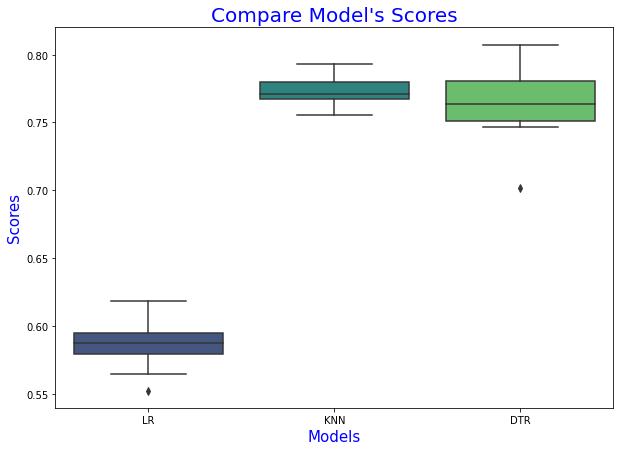

In [ ]:
import warnings
warnings.filterwarnings("ignore")

classic_models = [] 
classic_models.append(('LR', LinearRegression())) 
classic_models.append(('KNN', KNeighborsRegressor())) 
classic_models.append(('DTR', DecisionTreeRegressor())) 

# evaluate models using cross validation score:
classic_results = [] 
classic_names = []
for name, model in classic_models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2') 
    classic_results.append(cv_results) 
    classic_names.append(name) 
    print("Model Name:{} Model R2 Score:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

# Compare Model's Scores
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x=classic_names, y=classic_results,palette="viridis");
plt.title("Compare Model's Scores",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Scores',fontsize = 15,color='blue')

We can see from the boxplots above that the Linear Regression has the lowest r2 score among the rest, with the mean r2 score of 0.587. K-NEarest Neighbor and Decision Tree regressor almost performed equally on the data with r2 scores of respectively 0.773 and 0.766.

##Autoregressive Integrated Moving Average Model

In time series analysis, an **autoregressive integrated moving average (ARIMA)** model is a generalization of an **autoregressive moving average (ARMA)** model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series, forecasting. ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. [1]

**ARIMA** acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

**I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary

**AR:** Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA:** Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. [2]

##AutoRegressive Models

An **AR** model is basically a regression model. The term **Auto** indicates that it relies only on past period values to predict current ones. This is very natural to predict something based on its previous values, because the variable may change in a possible predictable way for example it may have some patterns that emerges and if we can capture that pattern we can have a stronger prediction. 

In an AR model, current period values are a sum of past outcomes multiplied by a numeric factor. it is denote as AR(p), where “p” is called the order of the model and represents the number of lagged values we want to include.

For instance, if we take X as time-series variable, then an AR(1), also known as a simple autoregressive model, would look something like this: 

$X_t$ = C + $ϕ_1$$X_{t-1}$ + $ϵ_t$

$X_{t-1}$  represents the value of X during the previous period.

$ϕ_1$ is a numeric constant by which we multiply the lagged variable $X_{t-1}$. You can interpret it as the part of the previous value which remains in the future. It’s good to note that these coefficients should always be between -1 and 1.

$ϵ_t$ is the residual and represents the difference between our prediction for period t and the correct value ($ϵ_t$  = $y_t$  – $ŷ_t$). These residuals are usually unpredictable differences because if there’s a pattern, it will be captured in the other incumbents of the model.

According to the equation, values at a given period ($X_t$) are equal to some portion ($ϕ_1$) of values in the last period ($X_{t-1}$), plus some constant benchmark and unpredictable noise $ϵ_t$.

It is vital to understand that we don’t use just any autoregressive model on a given dataset. We first need to determine how many lags (past values) to include in our analysis. For example, a time-series about meteorological conditions wouldn’t solely rely on the weather statistics a day ago. It’s realistic to say it would use data from the last 7 days. Hence, the model should take into account values up to 7 periods back. A model using two lags (AR(2)) would look as follows:

> $X_t$ = C + $ϕ_1$$X_{t-1}$ + $ϕ_2$$X_{t-2}$ + $ϵ_t$

As you can expect, a more complicated autoregressive model would consist of even more lagged values $X_{t-n}$, and their associated coefficients, $ϕ_n$. In general, a model that takes into account more data to make a prediction is usually better. However, you might get a stronger model, but it is probably prune to more statistical issues such as overfitting. Besides, if the coefficients (ϕ1, ϕ2,… ϕn) are not significantly different from 0, they would have no effect on the predicted values (since $ϕ_k$ $X_{t-k}$ = 0), so it makes little sense to include them in the model. Determining the significance of these coefficients cannot be done by hand. We will use **Partial Auto-Correlation Funcion (PACF)** and only keep the lags whose direct effects is high in magnitude either positive or negative, if these direct effects are zero or statistcally very close to zero we would not include them in our model to avoid niose and clutter.

[3]

##Moving Average

A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles. [4]

A Simple Moving Average (SMA) is calculated by summing up the closing values (prices) of the last x datapoints and dividing by the number of them. Exponential Moving Averages (EMA) assign more influence on recent numbers and less on old data because of a weighting variable in the calculation. This makes them more responsive to changes in values (prices) and also acts in smoothing out the line. [5]


##Partial Auto-Correlation Funcion (PACF)

Will fill it later

We 

[1] https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

[2] https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

[3] https://365datascience.com/autoregressive-model/

[4] https://en.wikipedia.org/wiki/Moving_average

[5] https://www.cmegroup.com/education/courses/technical-analysis/understanding-moving-averages.html

[6] https://www.statsmodels.org/devel/tsa.html

[7]https://www.youtube.com/watch?v=U7D1h5bbpcs

##Sarimax

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from itertools import combinations

from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import os,sys,inspect

In [ ]:
#import dataset

In [ ]:
#test stationarity

def test_stationarity(timeseries):
    #Determining rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
#
def seasonality_plot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [ ]:
#preprocessing the data
data=getData(avocadoDat_unproc) 

data = data.drop(columns = ['TotalVol','TotalBags','year','SmallHass','LargeHass','XLargeHass','SmallBags','LargeBags','XLargeBags'])
data = data.set_index('Date')
data = data.resample('W').sum()
print(data.head())

            AveragePrice
Date                    
2015-01-04        140.54
2015-01-11        148.03
2015-01-18        150.24
2015-01-25        150.89
2015-02-01        134.68


Using the “sm.tsa.seasonal_decompose” command from the pylab library we can decompose the time-series into three distinct components: trend, seasonality, and noise.


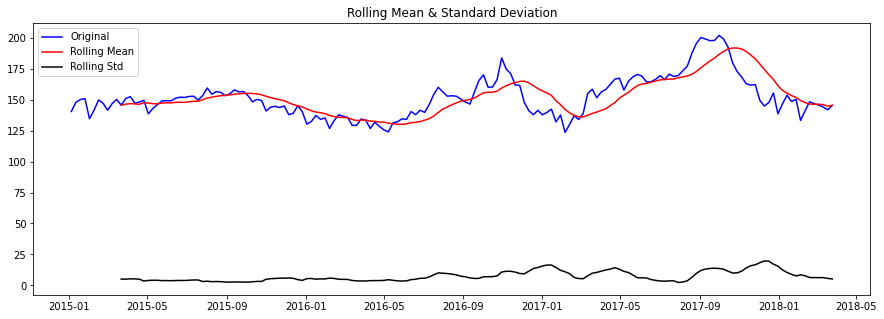

Results of Dickey-Fuller Test:
Test Statistic                  -2.363645
p-value                          0.152261
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


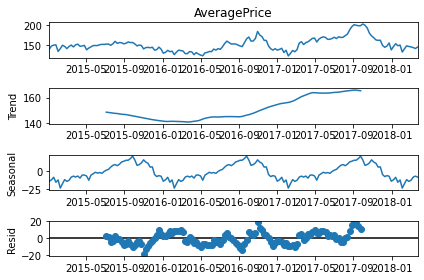

In [ ]:
#test stationarity and seasonality

test_stationarity(data['AveragePrice'])
#---------------------decompose data to trend, noise, seasonality----------------
dec = sm.tsa.seasonal_decompose(data['AveragePrice'], period = 52).plot()
plt.show()
#p-value < 0.05
#test statistic < critical value
#the moving average of the data is also nearly 0 and rotates around 0



Data has trend and seasonality. It is not stationary so we use differencing to make it so.


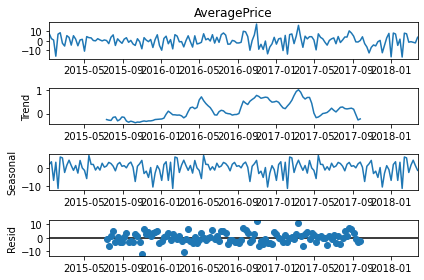

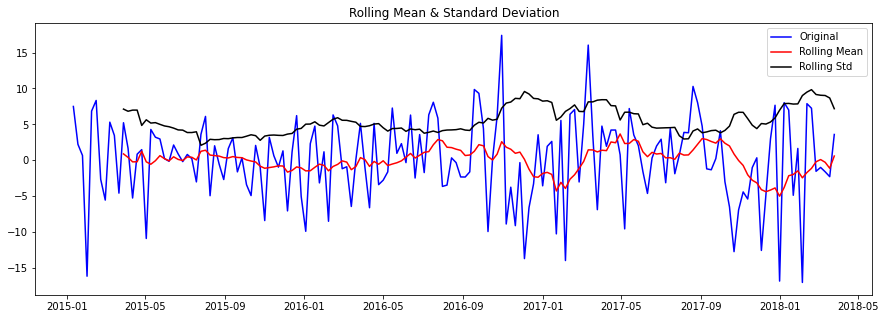

Results of Dickey-Fuller Test:
Test Statistic                -1.319906e+01
p-value                        1.103965e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


NameError: ignored

In [ ]:
#Data has trend and seasonality. It is not stationary so we use differencing to make it so
data_diff = data['AveragePrice'].diff() # To find the discrete difference 
data_diff = data_diff.dropna() #drop null values
dec = sm.tsa.seasonal_decompose(data_diff,period = 52).plot()

test_stationarity(data_diff)

tsplot(data_diff)

In [ ]:
###################################ARIMA and SARIMA#######################################################
#p: The number of lag observations included in the model, also called the lag order.
#d: The number of times that the raw observations are differenced, also called the degree of differencing.
#q: The size of the moving average window, also called the order of moving average.

model = ARIMA(data['AveragePrice'],order = (0,1,0))
model_fit = model.fit()
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:         D.AveragePrice   No. Observations:                  168
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -534.206
Method:                           css   S.D. of innovations              5.817
Date:                Thu, 30 Jul 2020   AIC                           1072.413
Time:                        18:30:51   BIC                           1078.661
Sample:                    01-11-2015   HQIC                          1074.948
                         - 03-25-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.449      0.065      0.948      -0.850       0.909


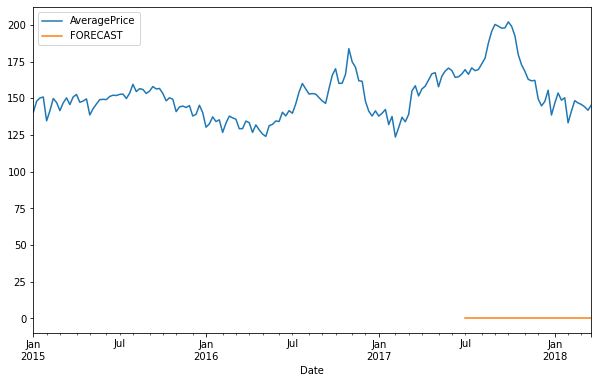

In [ ]:
#plotting the forecast
data['FORECAST'] = model_fit.predict(start = 130,end = 170,dynamic = True)
data[['AveragePrice','FORECAST']].plot(figsize = (10,6))


In [ ]:
#calculating the error
exp = [data.iloc[i,0] for i in range(130,len(data))]
pred = [data.iloc[i,1] for i in range(130,len(data))]
data = data.drop(columns = 'FORECAST')
error = mean_absolute_error(exp,pred)
print(error)

165.58532967032968


#Applying SARIMAX

In [ ]:
data_diff_seas = data_diff.diff(52)
data_diff_seas = data_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(data_diff_seas,period = 52).plot()

seasonal_plot(data_diff_seas)

TypeError: ignored

In [ ]:
model = sm.tsa.statespace.SARIMAX(data['AveragePrice'],order = (0,1,0),seasonal_order = (1,1,0,52))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       AveragePrice   No. Observations:                  169
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 52)   Log Likelihood                -388.610
Date:                            Thu, 30 Jul 2020   AIC                            781.220
Time:                                    18:32:40   BIC                            786.727
Sample:                                01-04-2015   HQIC                           783.455
                                     - 03-25-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.5634      0.067     -8.426      0.000      -0.694      -0.432
sigma2        40.0901      5.080   

11.641995084220435


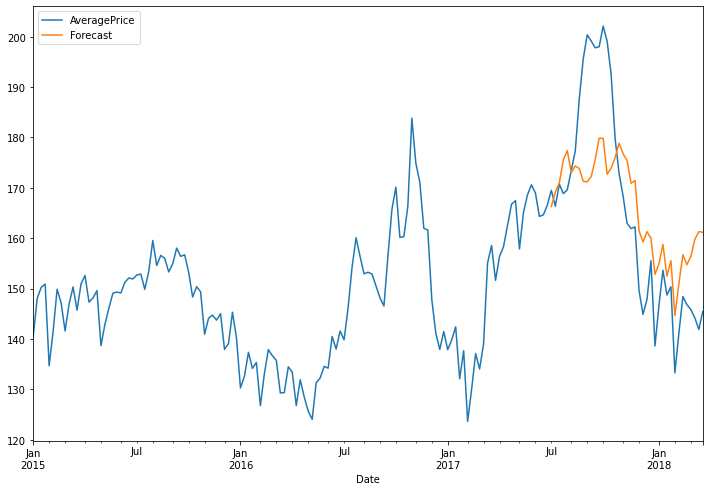

In [ ]:

data['Forecast'] = results.predict(start = 130,end = 169,dynamic = True)
data[['AveragePrice','Forecast']].plot(figsize = (12,8))

exp = [data.iloc[i,0] for i in range(130,len(data))]
pred = [data.iloc[i,1] for i in range(130,len(data))]

error = mean_absolute_error(exp,pred)
print(error)

# Deep Learning Model - LSTM

In the following our approach to implement and train a LSTM model is explained step by step.      

At first we need to retrieve the data.          
For our LSTM model we simply need the "AveragePrice" feature, which is why we drop all the other features. Also as we found out that there is less time stamps for the region of WestTexNewMexico, we drop all rows for this region as well.

In [ ]:
data = getData(avocadoDat_unproc)

data = data.drop(['Date', 'TotalVol', 'SmallHass', 'LargeHass', 'XLargeHass', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year'], 1)
data = data.drop( data[data.region == 'WestTexNewMexico'].index )
print(data.info())

# Check GPU availability
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
    print("GPU")
else:
    device = torch.device("cpu")
    print("CPU")

<class 'pandas.core.frame.DataFrame'>
Index: 17914 entries, 0 to 18236
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17914 non-null  float64
 1   region        17914 non-null  object 
dtypes: float64(1), object(1)
memory usage: 419.9+ KB
None
CPU


## LSTM Architecture

At second we implement our model architecture. In order to be able to implement RNN structures and specifications quickly, we decided to implement a BaseModel which can be used as an abstract class for several RNN architectures. Our chosen architecture is the LSTM.          

Several architectures for LSTM units are possible. A common architecture is composed of a cell and three "regulators", usually called gates. The Cell holds the capability to “remember” a certain value, whereas the Gates (an input gate, an output gate and a forget gate) determine the information flow within the LSTM unit. The weights of these connections, which need to be learned during training, determine how the gates operate. Often, the logistic sigmoid is used as the activation function in LSTMs.            
Mathematically explained, this means that for each input, each layer computes these functions:

> 

        it = σ ( Wii xt + bii + Whi ht-1 + bhi )
		ft = σ ( Wif xt + bif + Whf ht-1 + bhf )
		gt = tanh ( Wig xt + big + Whg ht-1 + bhg )
        ot = σ ( Wio xt + bio + Who ht-1 + bho )
		ct = ft ☉ ct-1 + it ☉ gt
		ht = ot ☉ tanh ( ct )

Hereby it is the input gate, ft is the forget gate, gt is the cell gate, ot is the output gate ct is the cell state at time t, ht bzw. ht-1 are the hidden states at the time t and t-1 respectively and xt is the input at time t.


In [ ]:
class BaseModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, sequence_len, n_layer, cell):

        super(BaseModel, self).__init__()
        
        self.hidden_size = hidden_size          # number of neurons that store information of previous inputs
        self.input_size = input_size            # size of a input element of a sequence
        self.output_size = output_size          # size of a output element
        self.sequence_len = sequence_len        # length of a sequence
        self.n_layer = n_layer                  # num of RNNs stacked on top of each other
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
		
        batch_first = True

        if cell == "RNN":
            self.model = nn.RNN(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.n_layer, batch_first=batch_first) #atch_first = True)
        
        if cell == "LSTM":
            self.model = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.n_layer, batch_first=batch_first) #batch_first = True)
        
        self.linear = nn.Linear(self.hidden_size, self.output_size)

    def init_hidden(self, batch_size):
        hidden = Variable(torch.zeros(self.n_layer * 1, batch_size, self.hidden_size))
        hidden=hidden.to(device)
        return hidden

class LSTMModel(BaseModel):
    def __init__(self, input_size, hidden_size, output_size, sequence_len, n_layer, cell):

        super(LSTMModel, self).__init__(input_size, hidden_size, output_size, sequence_len, n_layer, cell)
    
    def forward(self, input):
        batch_size = input.shape[0]

        h0 = self.init_hidden(batch_size)
        c0 = self.init_hidden(batch_size)
        
        lstmOut, (_hn, _cn) = self.model(input, (h0, c0))

        lstmOut = self.linear(lstmOut[:, -1, :])

        return lstmOut

## Training algorithm

At third, we implement our method for the training of the model.       
For this the dataset, the amounts of epochs, an optimizer, our model and a loss function have to be provided. In order to follow the training, we print out the loss at each epoch and store it for plotting.


In [ ]:
def train(dataset, n_epochs, optimizer, model, loss_function, device):
  
  model = model.to(device)
  lossBuffer = []
  
  for i in range(n_epochs):
    for features, labels in dataset:
      
      optimizer.zero_grad()
      
      inputs = features.reshape(1, -1, 1)
      inputs = inputs.to(device)
      
      out = model(inputs)
      out = out.to(device)
      labels = labels.reshape(1,1)
      labels = labels.to(device)
      
      loss = loss_function(out, labels)
      loss.backward()
      
      optimizer.step()
    
    print(f'epoch: {i:3} - loss: {loss.item():10.8f}')
    lossBuffer.append(loss.item())

  return model, lossBuffer


## Initialization of hyperparameters and creation of training data

At fourth, we need to creat our training dataset based on some hyperparameters.        
Time series are simply sequences of features of several continuous time stamps. As the LSTM also always takes the feature that it should be trained on as an input, the easiest input would be simply using the feature “AveragePrice” as an input. Also, the LSTM is always training based on a sequence in order to predict the value for the next time stamp. This means, data has to be fed into the model in a way, that a sequence contains all “AveragePrices” to an time stamp t and the output is then compared to the “AveragePrice” of the time stamp t+1.            
Accordingly we created a list consisting of n sequences and m labels for each region in the dataset. For a window size w of a single sequence and the total number of time stamps per region t, for each region n = t - w sequences were created. The n sequences simply differ from each other by an increment of one of the slide windows over all time stamps of a region. Likewise the label for each sequence always contains the value of the upper limit of the slide window + 1.

We set our hyperparameters in order to prepare for training.


In [ ]:
# hyperparameters 
lr = 0.00005
n_epochs = 20
hidden_size = 50
slide_win = 104

# Dataset preparation
train_seq = []

count = data.loc[data['region'] == data['region'].unique()[0], 'region'].count() #338
count_train = math.floor(count * 0.8) # train, test index

i=0

for i in range(data['region'].nunique()):
    avgPofReg = data.loc[data['region'] == data['region'].unique()[i], 'AveragePrice']
    avgPofReg = torch.Tensor(avgPofReg)

    for j in range(count_train - slide_win):
        features = avgPofReg[j:j+slide_win]
        label = avgPofReg[i+slide_win:i+slide_win+1]
        train_seq.append((features, label))

## Initialization of model, loss function, optimizer and training of model

At fivth, we initialize our model as well as the optimizer and the chosen loss function.         

Similar to Feed-forward Neural Networks, Recurrent Neural Networks and therefore also LSTMs the training of the model is done by feeding inputs into the model and comparing the outputs with the labels of the dataset with a loss function. For our project we used the MSELoss.          
The MSELoss measures the mean squared error, which is the squared L2 norm, between the input x, which is the predicted “AveragePrice” for one time stamp, and the target y, which is the label for the same tiHereby we decided to use the optimizer Adam.            
Adam is an “algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments”.
       
Now let' start the training!!!


In [ ]:
lstm_model = LSTMModel(input_size=1, hidden_size=hidden_size, output_size=1, n_layer=1, sequence_len=1, cell = "LSTM")
loss_function = nn.MSELoss() # or MSEloss           #CrossEntropy for Categories
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)

model, lossBuffer = train(train_seq, n_epochs, optimizer, lstm_model, loss_function, device)

## Visualization of training

At last, let's look at how our model performed while training.      
Our train method returns a list of losses for each epoch. Using mathplotlib we can visualize the change of the loss for all epochs.

In [ ]:
plt.plot(lossBuffer)
plt.show()